In [236]:
from sklearn import metrics
import matplotlib.pyplot as plt


In [237]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 17 15:11:36 2020
@author: bwilliams
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def data_cleaner(df):
    data = df.copy()
    #remove the id, partlybad columns
    data.drop(["id","partlybad"],1,inplace=True)
    #set new index using the date column
    data.set_index(["date"],inplace=True)
    #add binary 'class2' col for event/non-event
    data["class2"] = np.where(data["class4"] == "nonevent", "nonevent","event")
    #arrange to put class2 col at the front
    cols = ['class2'] + [col for col in data if col != 'class2']
    data = data[cols]
    return data

##### New way to generate the data

def data_generator(df):
    '''
    input:
        df: dataframe to split stratified by variable class
        class: string with variable to use as response and as variable to stratify by
    output:
        X_train, y_train: variables and response 60% data 
        X_val, y_val: variables and response 20% data 
        X_trainval, y_trainval: variables and response 80% data (for cross validation)
        X_test, y_test: variables and response 20% data 
    '''
    
    X = df.drop(["class2","class4"], axis=1)
    y = df['class4']

    return X, y


def convert_binary(y):
    '''
    Parameters
    ----------
    y : repsonse variable with 4 classes
    Returns
    -------
    y : reponse variable 2 classes
    '''
    y_bin = np.where(y == "nonevent", "nonevent","event")
    return y_bin

#test with answers
url = "https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/npf_test.csv"
df = pd.read_csv(url)
df = data_cleaner(df)

X_ans,y_ans = data_generator(df)


# If needed conversion from 4 classes to binary classes
y_ans_bin = convert_binary(y_ans)






In [238]:
url = "https://raw.githubusercontent.com/williwilliams3/TermProjectIML/master/bin/answers.csv"
ans = pd.read_csv(url)
ans.drop(["class4"],0,inplace=True)

ans_class = ans.index
ans_class_bin = convert_binary(ans_class)

ans.head()
probs = ans.iloc[:,0].values


predictions vs reality 0.6787564766839378


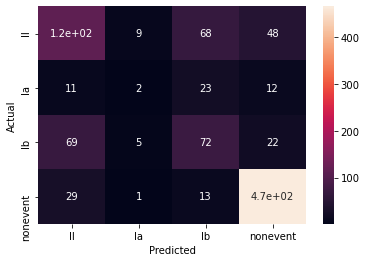

In [239]:
import seaborn as sns

print('predictions vs reality',metrics.accuracy_score(y_ans, ans_class))


confusion_matrix = pd.crosstab(y_ans, ans_class, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


predictions vs reality 0.8704663212435233


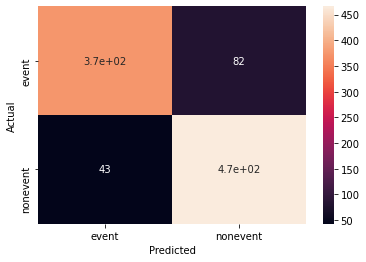

In [240]:

print('predictions vs reality',metrics.accuracy_score(y_ans_bin, ans_class_bin))


confusion_matrix = pd.crosstab(y_ans_bin, ans_class_bin, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
#gives double false negatives



In [241]:
np.std(X_ans)

CO2168.mean    11.061556
CO2168.std      3.374626
CO2336.mean    11.028459
CO2336.std      3.138763
CO242.mean     10.664660
                 ...    
UV_A.std        4.948165
UV_B.mean       0.305897
UV_B.std        0.278218
CS.mean         0.002182
CS.std          0.000635
Length: 100, dtype: float64

In [242]:
covMatrix = np.cov(X_ans,bias=True)


In [243]:
print(covMatrix)


[[25638.09744345 22049.16326495 20619.18032882 ... 22625.77072505
  23430.73493787 21977.817794  ]
 [22049.16326495 22285.79974515 21055.63615377 ... 22527.26274872
  22402.01893113 21844.45422195]
 [20619.18032882 21055.63615377 20324.27436545 ... 21331.01159635
  21119.7288631  20839.51027482]
 ...
 [22625.77072505 22527.26274872 21331.01159635 ... 22837.13473116
  22784.44317428 22153.68083167]
 [23430.73493787 22402.01893113 21119.7288631  ... 22784.44317428
  23011.66137974 22111.7560563 ]
 [21977.817794   21844.45422195 20839.51027482 ... 22153.68083167
  22111.7560563  21599.76037234]]


In [244]:
#visualise what we got wrong
import statistics

ans_data = pd.DataFrame(np.c_[df,ans.index])

cols = [102] + [col for col in ans_data if col != 102]
ans_data = ans_data[cols]

correct = ans_data[ans_data[102]==ans_data[1]]
wrong = ans_data[ans_data[102]!=ans_data[1]]

df_correct = pd.DataFrame(correct)
df_wrong = pd.DataFrame(wrong)

corr = df_correct.corr()
df_correct.head()

,102,0,1,2,3,4,5,6,7,8,...,92,93,94,95,96,97,98,99,100,101
2,nonevent,nonevent,nonevent,380.339,0.928028,380.316,0.917636,380.55,0.936683,380.301,...,1.28498,0.379219,1.73785,0.365878,0.720849,0.427279,0.0151789,0.0104708,0.00233441,0.00034727
3,Ib,event,Ib,381.048,1.29008,381.231,1.24549,381.359,1.81787,381.29,...,10.2983,3.2811,11.1486,3.47868,19.5687,14.4805,0.783038,0.703191,0.00186788,0.000593644
5,Ib,event,Ib,381.804,0.174819,381.8,0.167803,382.015,0.254768,381.778,...,-6.48417,2.32461,-5.48893,2.39159,10.6256,6.67635,0.243887,0.182965,0.0014845,0.000132264
6,II,event,II,381.466,7.37622,381.328,6.67793,383.152,9.31825,380.875,...,21.5466,2.97303,22.1619,3.84099,22.2811,15.6367,1.07732,0.93635,0.00573921,0.000615564
7,II,event,II,368.388,5.32384,367.802,4.40871,369.788,7.02958,367.515,...,10.9647,1.7724,11.6236,2.41078,11.6957,9.17349,0.425933,0.400514,0.0050785,0.00365834


In [245]:
# Read npf_train to get real column names
npf_train = pd.read_csv("cleaned_data/npf_train.csv", index_col="id")
npf_train.head()

# Get col names
col_names = list(npf_train.columns)

# Add first "true_class4"
col_names = ["true_class4"] + col_names

# Rename class4 and class2 to pred_class4 and pred_class2
col_names[1] = "pred_class2"
col_names[2] = "pred_class4"

In [246]:
# Set names to correct and wrong and change feature type to float
df_correct.columns = col_names
df_correct = df_correct.infer_objects()
df_correct

df_wrong.columns = col_names
df_wrong = df_wrong.infer_objects()
df_wrong

,true_class4,pred_class2,pred_class4,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,nonevent,event,II,377.448880,2.920241,377.632640,2.666835,377.908080,3.440430,377.708240,...,18.421232,2.267065,19.059027,2.320316,12.572064,9.623161,0.645959,0.558320,0.006159,0.000797
1,nonevent,event,Ib,369.589091,0.210402,369.632955,0.201409,369.904200,0.252167,369.601600,...,-0.036312,0.180361,0.476219,0.192571,1.479447,0.640776,0.028665,0.013506,0.000361,0.000031
4,nonevent,event,II,371.620857,8.552564,371.245461,7.605137,373.101151,10.027695,370.722624,...,8.398302,1.479949,8.798417,1.900331,7.591540,4.579817,0.319340,0.247098,0.002649,0.000701
9,II,nonevent,nonevent,387.892222,1.904218,388.103392,1.811853,388.425789,2.219697,388.173626,...,5.457702,2.240514,6.345673,2.665432,18.015230,12.570265,0.733355,0.607471,0.001394,0.000181
11,Ib,nonevent,nonevent,365.644000,4.787179,365.641946,4.574528,366.369247,5.767204,365.389516,...,20.131869,2.874302,20.868751,3.832091,21.975549,15.526796,1.040405,0.907203,0.004359,0.000883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,nonevent,event,II,401.099775,20.960630,399.400565,19.351218,408.251573,27.656008,397.391582,...,19.005672,0.983251,19.251801,1.198850,7.918390,7.818146,0.419391,0.482914,0.004914,0.001156
948,nonevent,event,Ib,369.976702,5.911591,370.020366,5.634612,373.521780,9.318012,370.093717,...,21.525162,1.949730,22.021624,2.737505,20.489423,15.516947,0.946850,0.858577,0.005615,0.003473
949,Ia,event,II,371.712887,1.623392,371.639896,1.290662,372.126042,1.972161,371.565000,...,-2.261023,0.749901,-1.445667,0.761688,4.800690,3.537198,0.134349,0.112959,0.000441,0.000127
959,II,event,Ia,391.383830,2.002890,391.416525,1.902028,391.342429,2.086344,391.394714,...,6.865263,2.352130,7.674073,2.501632,14.631595,10.441152,0.588622,0.494777,0.002249,0.001564


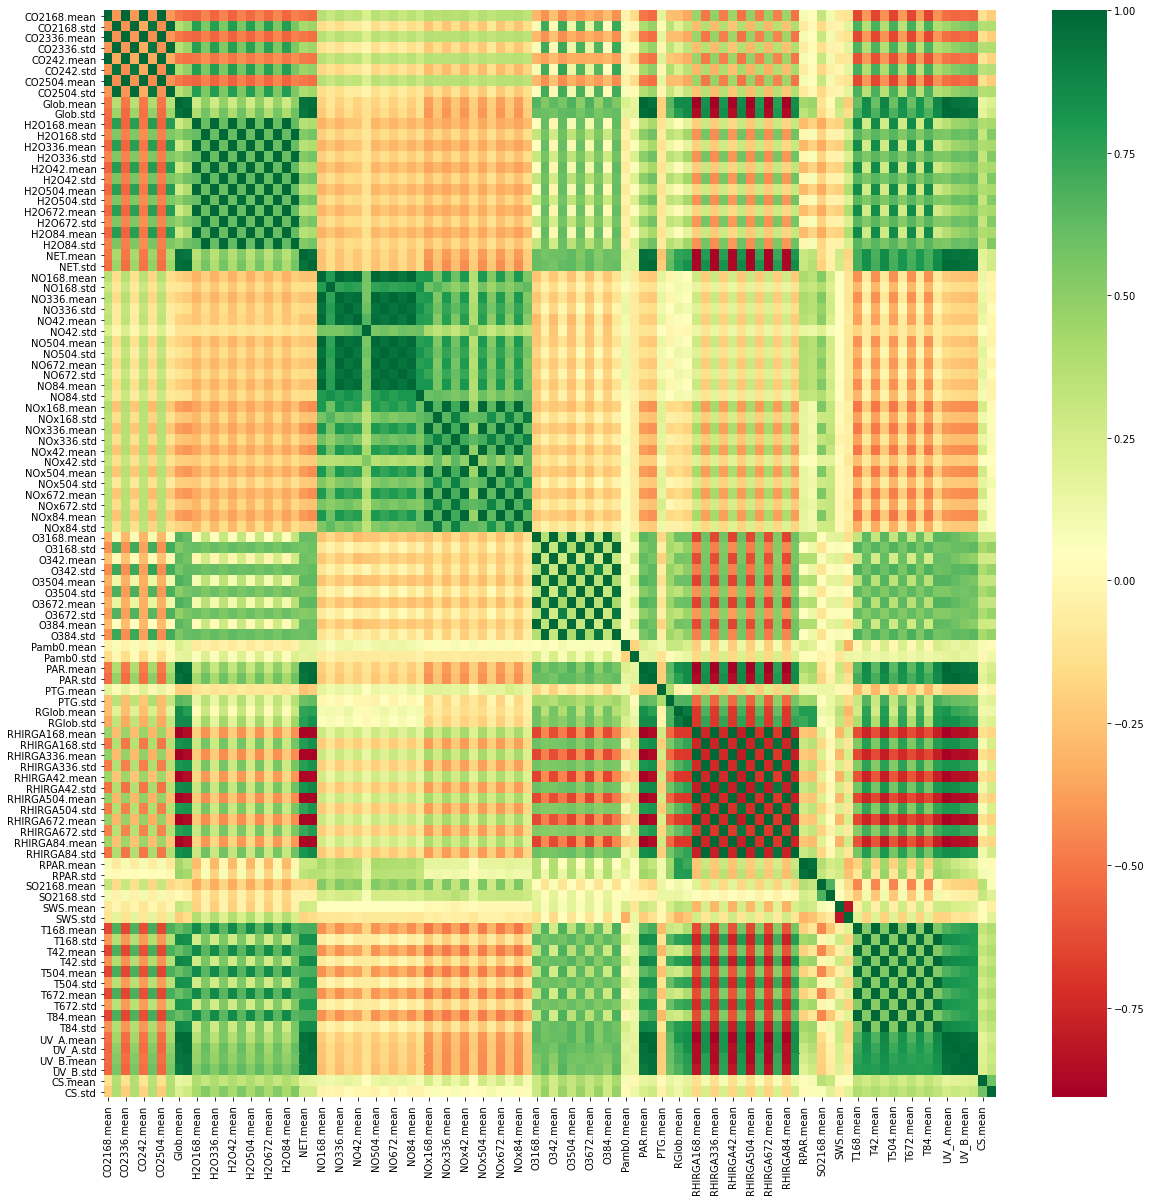

In [247]:
# Correct
corrmat = df_correct.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_correct[top_corr_features].corr(),annot=False,cmap="RdYlGn")
plt.savefig('Project_report/project_figures/df_correct_correlationmatrix.png')
plt.savefig('Project_report/project_figures/df_correct_correlationmatrix.pdf') 

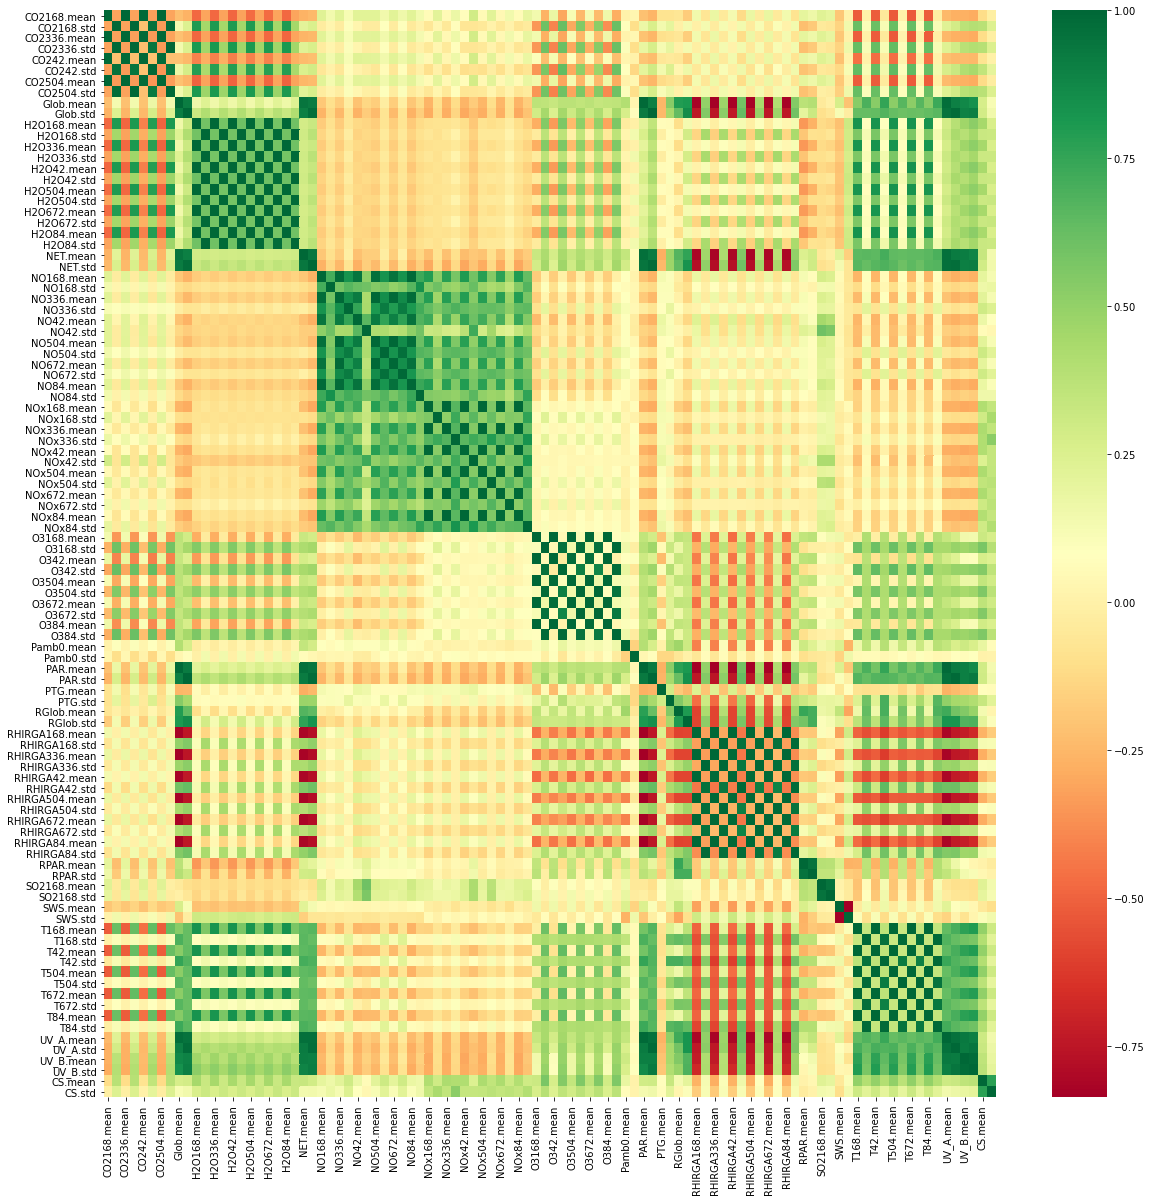

In [248]:
# Wrong
corrmat = df_wrong.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_wrong[top_corr_features].corr(),annot=False,cmap="RdYlGn")
plt.savefig('Project_report/project_figures/df_wrong_correlationmatrix.png') 
plt.savefig('Project_report/project_figures/df_wrong_correlationmatrix.pdf') 

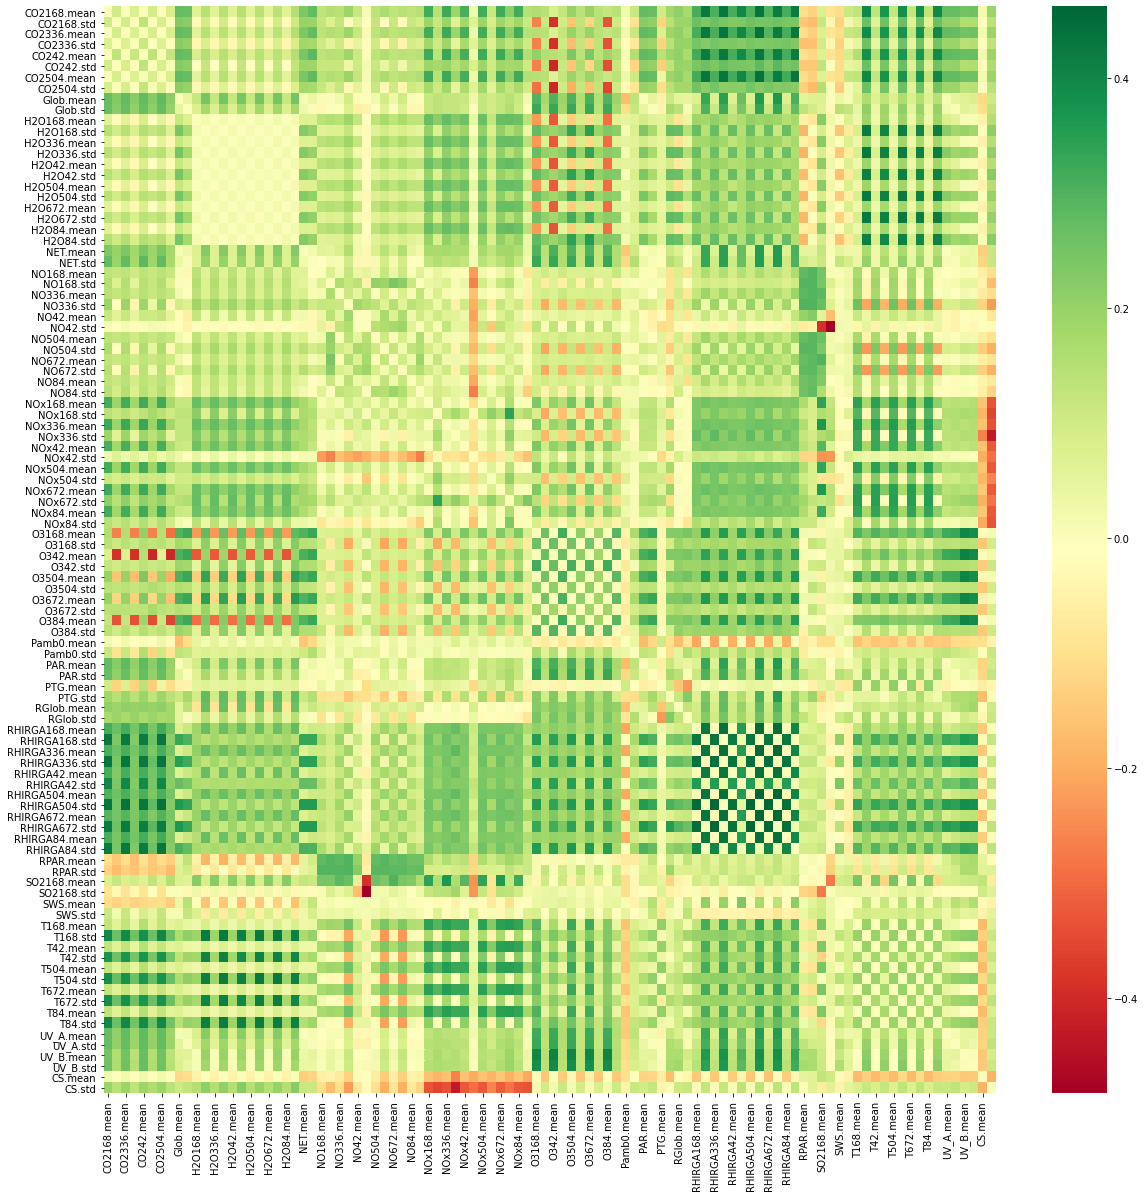

In [261]:
# Calc absolute correlation values
corrmat_correct = df_correct.corr().abs()
corrmat_wrong = df_wrong.corr().abs()

correlation_diff = corrmat_correct - corrmat_wrong
#correlation_diff = correlation_diff.abs()

plt.figure(figsize=(20,20))
cmap = plt.cm.get_cmap('RdYlGn')
g=sns.heatmap(correlation_diff, annot=False, cmap=cmap)
plt.savefig('Project_report/project_figures/corr_matrices_difference.png') 
plt.savefig('Project_report/project_figures/corr_matrices_difference.pdf') 